In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

#Data reading
reviews = pd.read_csv('./seattle_reviews.csv')
calendar = pd.read_csv('./seattle_calendar.csv')
listings = pd.read_csv('./seattle_listings.csv')



In [18]:
#handle datasets dimensions

print("reviews: ", reviews.shape)
print("calendar: ", calendar.shape)
print("listings: ", listings.shape)

reviews:  (84849, 6)
calendar:  (1393570, 4)
listings:  (3818, 92)


In [22]:
#getting info about columns in the datasets
calendar.info()
reviews.info()
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data colu

In [ ]:
#info above show that we have useless data in "listings" in column "license"
#drop the column in order to have clean data
listings.drop('license', axis=1, inplace=True)

In [ ]:
#now that we have understood columns of the dataset we can start to prepare our data.
#The blog post would like to be a guide for an holiday in Seattle.
#Aim is to answer to these questions:
#1) What's the cheapest month to stay in AirBnB in Seattle?
#2) What's the cheapest day of the week to stay in AirBnB in Seattle?
#3) What are the cheapest solutions in Seattle=

In [5]:
#convert price to float
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype(float)

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [42]:
#convert date to date format
calendar['date'] = pd.to_datetime(calendar['date'])

In [43]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [51]:
#drop all null prices values
calendar_new = calendar.dropna()
calendar_new.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [60]:
# check average price per month
month_mean_price = calendar_new.groupby(calendar_new['date'].dt.strftime('%m'))['price'].mean()
month_mean_price = pd.DataFrame(month_mean_price).reset_index()
month_mean_price

,date,price
0,01,122.912176
1,02,124.293927
2,03,128.644488
3,04,135.097005
4,05,139.538183
5,06,147.473137
6,07,152.094150
7,08,150.656594
8,09,143.255949
9,10,137.031939


In [62]:
#replace month number with month names for plots
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_mean_price['date'] = month_mean_price.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], months)
month_mean_price

,date,price
0,Jan,122.912176
1,Feb,124.293927
2,Mar,128.644488
3,Apr,135.097005
4,May,139.538183
5,Jun,147.473137
6,Jul,152.094150
7,Aug,150.656594
8,Sep,143.255949
9,Oct,137.031939


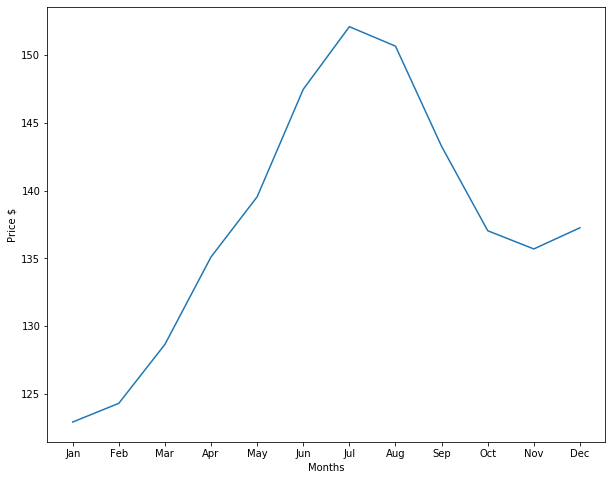

In [85]:
#visualize the plot
plt.figure(figsize=(10,8))
plt.plot(month_mean_price['date'],month_mean_price['price'])
plt.xlabel("Months") 
plt.ylabel("Price $")
plt.show()

In [63]:
# check average price per day
day_mean_price = calendar_new.groupby(calendar_new['date'].dt.strftime('%w'))['price'].mean()
day_mean_price = pd.DataFrame(day_mean_price).reset_index()
day_mean_price

,date,price
0,0,136.459941
1,1,135.676414
2,2,135.408764
3,3,135.447880
4,4,136.476032
5,5,143.036294
6,6,143.202136


In [64]:
#replace day number with day names for plots
days =['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_mean_price['date'] = day_mean_price.replace(['0','1','2','3','4','5','6'], days)
day_mean_price

,date,price
0,Mon,136.459941
1,Tue,135.676414
2,Wed,135.408764
3,Thu,135.447880
4,Fri,136.476032
5,Sat,143.036294
6,Sun,143.202136


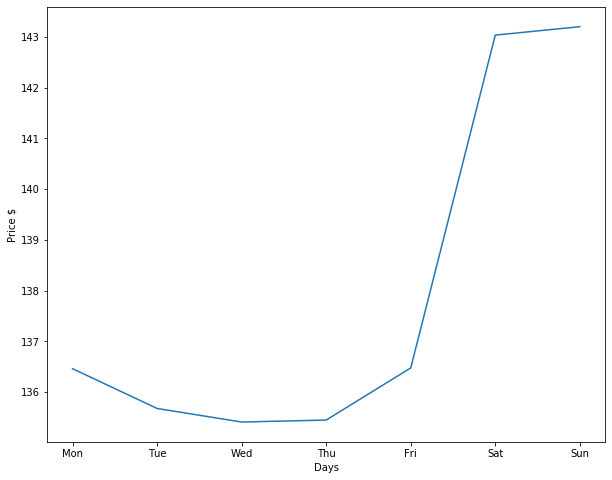

In [84]:
#visualize the plot
plt.figure(figsize=(10,8))
plt.plot(day_mean_price['date'],day_mean_price['price'])
plt.xlabel("Days") 
plt.ylabel("Price $")
plt.show()

In [86]:
#get the info we need for last question
listings_keys = listings[['id','name']]

In [87]:
listings_keys.head()

,id,name
0,241032,Stylish Queen Anne Apartment
1,953595,Bright & Airy Queen Anne Apartment
2,3308979,New Modern House-Amazing water view
3,7421966,Queen Anne Chateau
4,278830,Charming craftsman 3 bdm house


In [ ]:
#rename columns for join
listings_keys = listings_keys.rename(columns = {'id':'listing_id'})

In [90]:
#doing the join
calendar_getnames = pd.merge(calendar_new, listings_keys, on=['listing_id','listing_id'])

In [91]:
#check the new table created
calendar_getnames.head()

,listing_id,date,available,price,name
0,241032,2016-01-04,t,85.0,Stylish Queen Anne Apartment
1,241032,2016-01-05,t,85.0,Stylish Queen Anne Apartment
2,241032,2016-01-13,t,85.0,Stylish Queen Anne Apartment
3,241032,2016-01-14,t,85.0,Stylish Queen Anne Apartment
4,241032,2016-01-18,t,85.0,Stylish Queen Anne Apartment


In [92]:
#get the cheapest solutions by sorting by average price
calendar_getnames.groupby('name')['price'].mean().sort_values(ascending=True)

name
Cozy, cute, Queen Anne living            20.000000
Pullout Bed in CAP HILL on Pike St.      21.176471
Between downtown & SeaTac, Bohemian      25.000000
Ideal Location + Bike - (Bttm Bunk)      25.000000
Room E Single Bed in the conner          25.000000
                                          ...     
Penthouse Suite Top Floor               910.270718
Beautiful Home near Downtown            950.000000
Cute Basement Apartment                1000.000000
Luxurious, Modern, Panoramic Views     1010.977716
New Modern House-Amazing water view    1301.818182
Name: price, Length: 3699, dtype: float64